### Previsão do sucesso acadêmico de estudantes da gradução utilizando Naive Bayes


---

Grupo:


*   Gabriel Nogueira de Moura Pereira (gnmp)
*   Giovanna de Cassia (gcs5)
*   Mariana Guimarães Coelho (mgc3)
*



In [ ]:
# Manipulação de dados
import numpy as np
import pandas as pd

import math

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

### Leitura de dados

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

data = pd.read_csv("/content/drive/MyDrive/estatistica/student_data.csv", delimiter=';')

In [ ]:
data.describe()

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Análise exploratória de dados

In [ ]:
# Verificar dados nulos
pd.options.mode.use_inf_as_na = True # Define valores infinitos como NaN
print(f"-> Dados nulos: {data.isnull().sum().sum()}")
print(f"-> Dados duplicados: {data.duplicated().sum()}")

-> Dados nulos: 0
-> Dados duplicados: 0


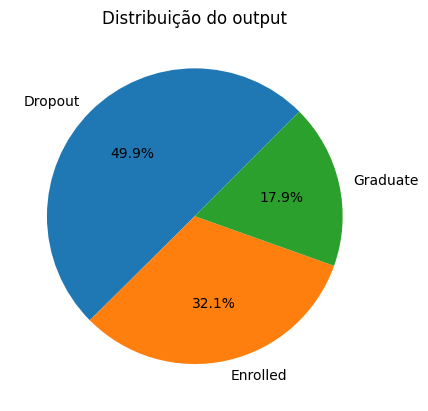

In [ ]:
# Como queremos prever a classe "output", faz-se necessário observar se ela está desbalanceada,
# para evitar viés na classificação.
plt.pie(data['Output'].value_counts().values, labels=np.unique(data['Output']), autopct='%1.1f%%', startangle=45)
plt.title('Distribuição do output')
plt.show()

Como a distribuição não encontra-se muito desbalanceada, não serão utilizadas técnicas para balancear os dados.

In [ ]:
# Lista de variáveis categóricas, retiradas da descrição do dataset.
variaveis_categoricas = ['Marital status', 'Course', 'Nacionality', "Father's occupation",
                         'Application mode', "Mother's occupation", 'Educational special needs',
                         'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
                         'International', 'Displaced', 'evening attendance'
                        ]

# Lista de variáveis numéricas
variaveis_numericas = [col for col in data.columns if col not in variaveis_categoricas]
variaveis_numericas.remove('Output') # Retirar coluna de saída

variaveis = variaveis_categoricas + variaveis_numericas

Como comentado anteriormente, estamos interessados na coluna "output", dito isso, podemos plotar histogramas para observar a relação dessa coluna com as outras.

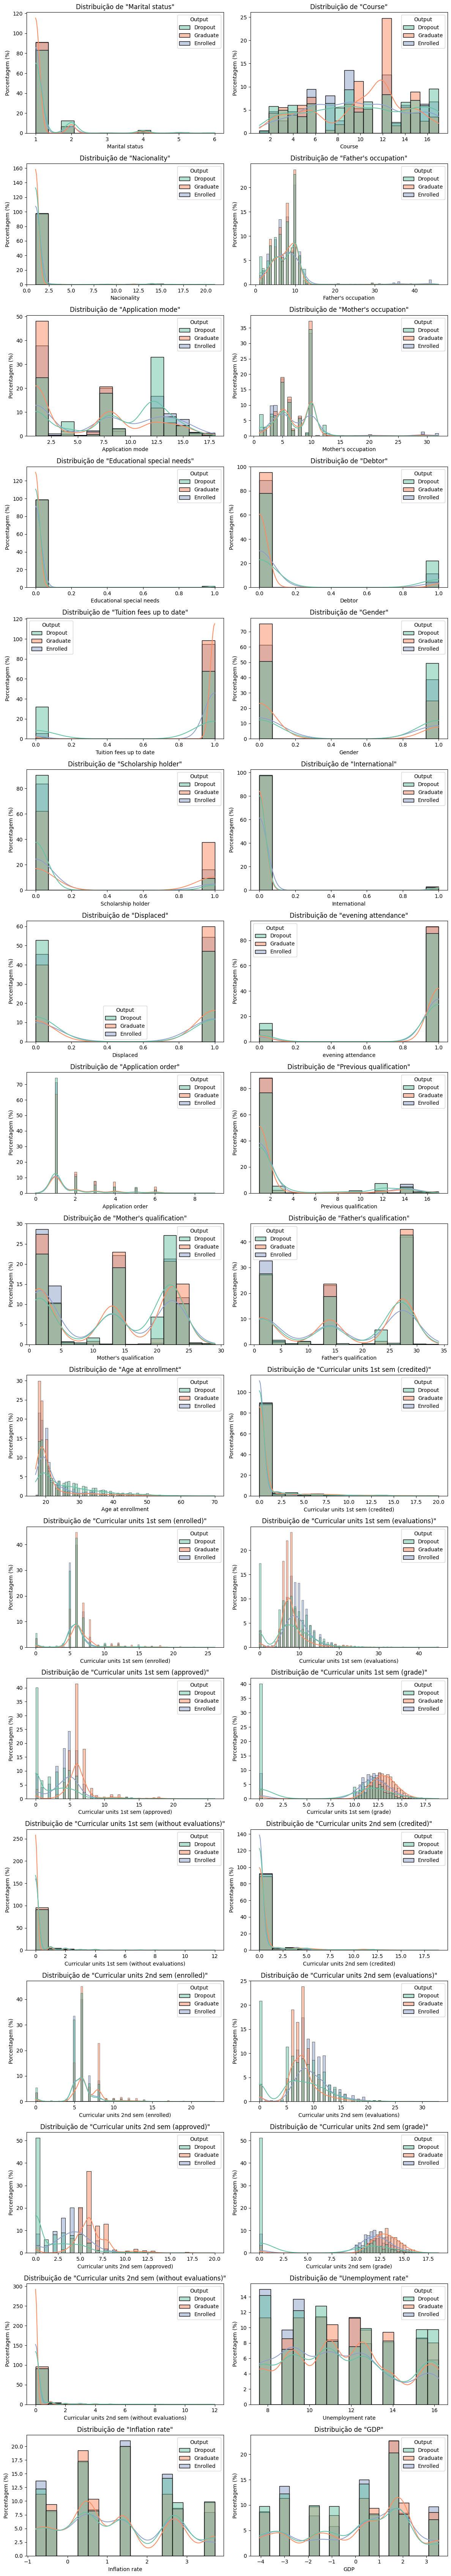

In [ ]:
# Definição do número de gráficos
n_colunas = len(variaveis)
n_subplots = math.ceil(n_colunas / 2)

# Criação dos gráficos
fig, axes = plt.subplots(n_subplots, 2, figsize=(12, 4 * n_subplots))
axes = axes.flatten()

# Plotar distribuição em histograma para cada coluna numérica
for i in range(n_colunas):
    sns.histplot(data=data, x=variaveis[i], hue="Output", stat="percent", palette="Set2", common_norm=False, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribuição de "{variaveis[i]}"')
    axes[i].set_ylabel("Porcentagem (%)")

# Ajuste do layout
plt.tight_layout()
plt.show()

#### Conclusões que podem ser tiradas dos gráficos:
*   
*   Na distribuição de "Gender", ao observar a curva relacionada à classe "dropout", observa-se que homens e mulheres possuem chances semelhantes de não continuarem a graduação.





<ipython-input-13-ea8815142e28>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


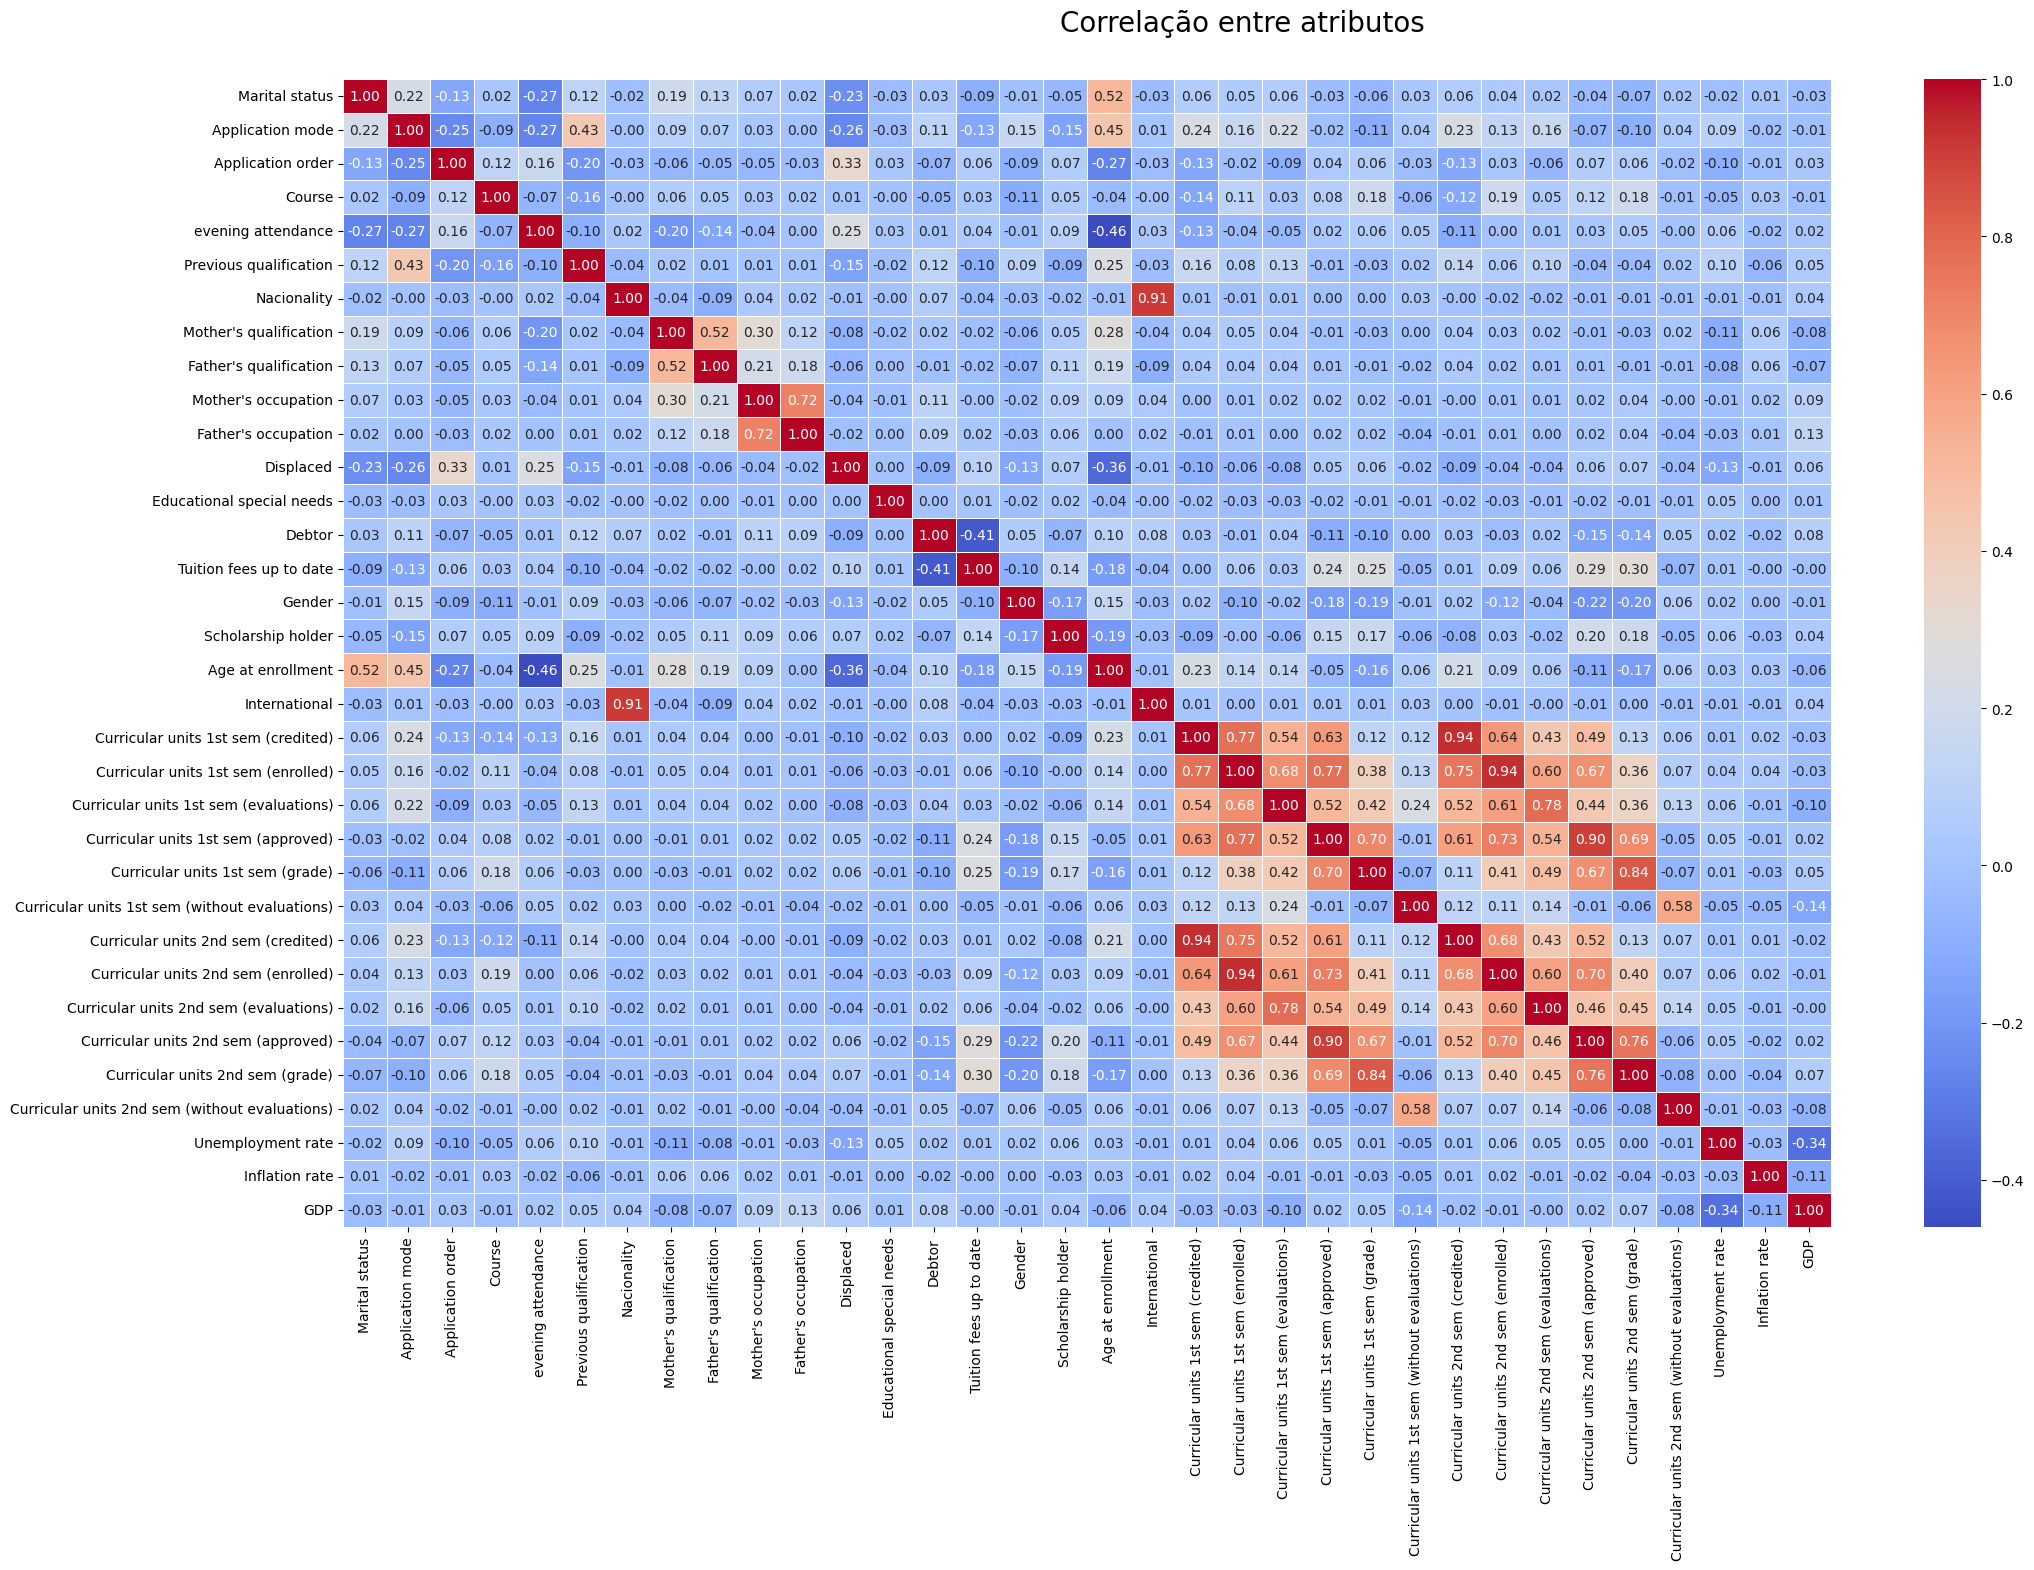

In [ ]:
# Correlação
f, ax = plt.subplots(figsize=(24, 14))
corr = data.corr()
hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap="coolwarm", fmt=".2f", linewidths=0.5)
f.subplots_adjust(top=0.93)
t = f.suptitle("Correlação entre atributos", fontsize=20)

### Treinamento do modelo

#### Tratamento dos dados

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: ", accuracy)

Acurácia:  0.6836158192090396


#### Experimento

In [ ]:
experiment_data = [{
    'Marital status': 1,
    'Application mode': 57,
    'Application order': 3,
    'Course': 9130,
    'evening attendance': 1,
    'Previous qualification': 1,
    'Nacionality': 41,
    "Mother's qualification": 2,
    "Father's qualification": 1,
    "Mother's occupation": 99,
    "Father's occupation": 192,
    'Displaced': 0,
    'Educational special needs': 0,
    'Debtor': 1,
    'Tuition fees up to date': 1,
    'Gender': 1,
    'Scholarship holder': 1,
    'Age at enrollment': 18,
    'International': 1,
    'Curricular units 1st sem (credited)': 5,
    'Curricular units 1st sem (enrolled)': 5,
    'Curricular units 1st sem (evaluations)': 3,
    'Curricular units 1st sem (approved)': 5,
    'Curricular units 1st sem (grade)': 8,
    'Curricular units 1st sem (without evaluations)': 1,
    'Curricular units 2nd sem (credited)': 7,
    'Curricular units 2nd sem (enrolled)': 7,
    'Curricular units 2nd sem (evaluations)': 6,
    'Curricular units 2nd sem (approved)': 6,
    'Curricular units 2nd sem (grade)': 7,
    'Curricular units 2nd sem (without evaluations)': 1,
    'Unemployment rate': 14,
    'Inflation rate': 11,
    'GDP': 2.56
}, {
    'Marital status': 1,
    'Application mode': 9,
    'Application order': 1,
    'Course': 10,
    'evening attendance': 1,
    'Previous qualification': 1,
    'Nacionality': 1,
    "Mother's qualification": 22,
    "Father's qualification": 1,
    "Mother's occupation": 10,
    "Father's occupation": 123,
    'Displaced': 0,
    'Educational special needs': 0,
    'Debtor': 0,
    'Tuition fees up to date': 1,
    'Gender': 0,
    'Scholarship holder': 1,
    'Age at enrollment': 20,
    'International': 1,
    'Curricular units 1st sem (credited)': 0,
    'Curricular units 1st sem (enrolled)': 6,
    'Curricular units 1st sem (evaluations)': 0,
    'Curricular units 1st sem (approved)': 6,
    'Curricular units 1st sem (grade)': 10,
    'Curricular units 1st sem (without evaluations)': 0,
    'Curricular units 2nd sem (credited)': 0,
    'Curricular units 2nd sem (enrolled)': 6,
    'Curricular units 2nd sem (evaluations)': 14,
    'Curricular units 2nd sem (approved)': 2,
    'Curricular units 2nd sem (grade)': 15,
    'Curricular units 2nd sem (without evaluations)': 0,
    'Unemployment rate': 7,
    'Inflation rate': 9,
    'GDP': 9.23
}, {
    'Marital status': 2,
    'Application mode': 12,
    'Application order': 1,
    'Course': 3,
    'evening attendance': 0,
    'Previous qualification': 1,
    'Nacionality': 22,
    "Mother's qualification": 28,
    "Father's qualification": 10,
    "Mother's occupation": 6,
    "Father's occupation": 123,
    'Displaced': 0,
    'Educational special needs': 0,
    'Debtor': 0,
    'Tuition fees up to date': 1,
    'Gender': 0,
    'Scholarship holder': 1,
    'Age at enrollment': 20,
    'International': 1,
    'Curricular units 1st sem (credited)': 0,
    'Curricular units 1st sem (enrolled)': 4,
    'Curricular units 1st sem (evaluations)': 0,
    'Curricular units 1st sem (approved)': 4,
    'Curricular units 1st sem (grade)': 10,
    'Curricular units 1st sem (without evaluations)': 0,
    'Curricular units 2nd sem (credited)': 0,
    'Curricular units 2nd sem (enrolled)': 6,
    'Curricular units 2nd sem (evaluations)': 6,
    'Curricular units 2nd sem (approved)': 6,
    'Curricular units 2nd sem (grade)': 13,
    'Curricular units 2nd sem (without evaluations)': 0,
    'Unemployment rate': 13,
    'Inflation rate': 2.5,
    'GDP': 0.8
}]

experiment_df = pd.DataFrame(experiment_data)

In [ ]:
pred = gnb.predict(experiment_df)
print(pred)

['Dropout' 'Enrolled' 'Enrolled']


#### Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: ", accuracy)

Acurácia:  0.6926553672316385


### Treinamento do modelo com variáveis de alta correlação removidas

In [ ]:
data_new = data.drop(columns=["Nacionality", "Curricular units 1st sem (credited)",
                              "Curricular units 1st sem (enrolled)", "Curricular units 2nd sem (credited)",
                              "Curricular units 2nd sem (enrolled)", "Curricular units 1st sem (approved)",
                              "Curricular units 2nd sem (approved)", "Curricular units 1st sem (grade)",
                              "Curricular units 2nd sem (grade)", "Mother's occupation",
                              "Father's occupation", "Curricular units 1st sem (evaluations)",
                              "Curricular units 2nd sem (evaluations)"])


<ipython-input-20-3a8d2e725106>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_new.corr()


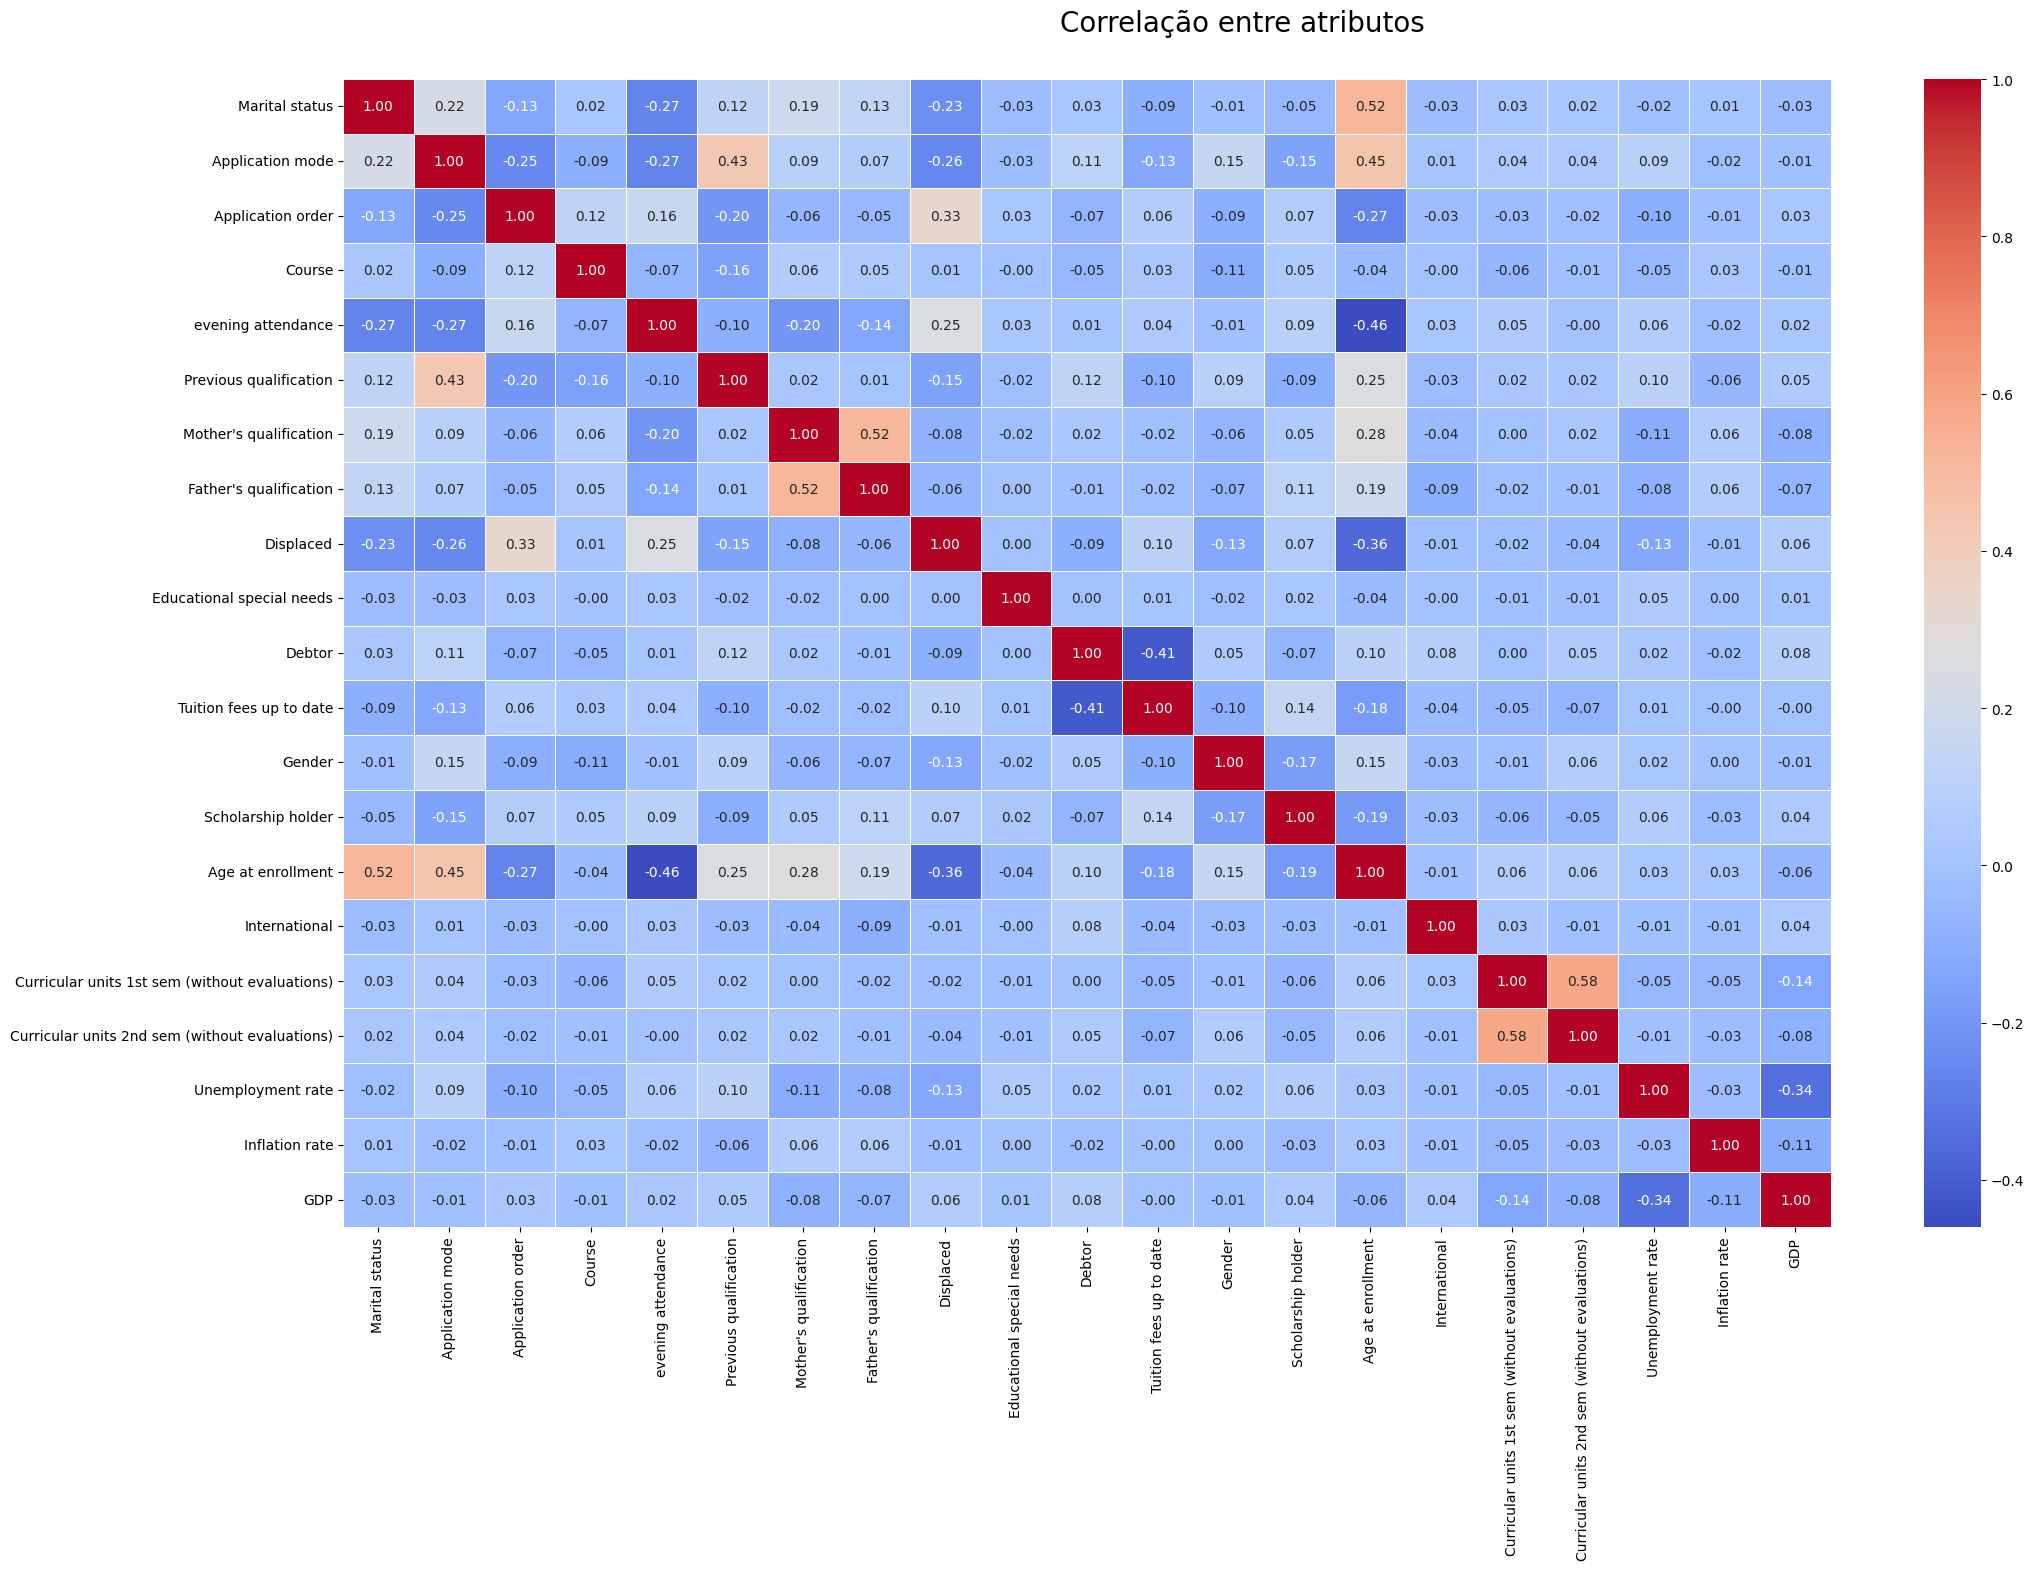

In [ ]:
# Correlação
f, ax = plt.subplots(figsize=(24, 14))
corr = data_new.corr()
hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap="coolwarm", fmt=".2f", linewidths=0.5)
f.subplots_adjust(top=0.93)
t = f.suptitle("Correlação entre atributos", fontsize=20)

In [ ]:
X = data_new.iloc[:, :-1]
y = data_new.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: ", accuracy)

Acurácia:  0.5706214689265536


#### Bernoulli Naive Bayes

In [ ]:
bnb = BernoulliNB()
y_pred = bnb.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: ", accuracy)

Acurácia:  0.6045197740112994


### Validação cruzada

#### Gaussian Naive Bayes

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

kf = KFold(n_splits=4000, shuffle=True, random_state=12)
gnb = GaussianNB()
scores = cross_val_score(gnb, X, y, cv=kf, scoring="accuracy")

print("Acurácia da validação cruzada:", scores.mean())

Acurácia da validação cruzada: 0.688375


#### Bernoulli Naive Bayes

In [ ]:
bnb = BernoulliNB()
scores = cross_val_score(bnb, X, y, cv=kf, scoring="accuracy")
print("Acurácia da validação cruzada:", scores.mean())

Acurácia da validação cruzada: 0.681625
